In [1]:
import sys
sys.path.insert(0, '..')

In [2]:
from Utils.Loss import Loss_Functions
from Models.LinReg import LinearRegression, RegularizedLinearRegression
from Utils.Scalers import Scalers
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

# Стандартизация + Линейная регрессия `своими руками`

In [3]:
X, y = datasets.make_regression()
scale = Scalers()
my_x_sscale = scale.StandardScaler(X)

### 1. Обучение `без стандартизации`

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=0)
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

loss = Loss_Functions()
print(loss.MSE(y_pred, y_test))

9239.101574008459


### 2. Обучение `со стадратизацией`

In [5]:
my_x_sscale_train, my_x_sscale_test, y_train, y_test = train_test_split(my_x_sscale, y, test_size=0.2, train_size=0.8, random_state=0)

reg2 = LinearRegression() # Без регуляризации
reg2.fit(my_x_sscale_train, y_train)
y_pred2 = reg2.predict(my_x_sscale_test)

loss = Loss_Functions()
print(loss.MSE(y_pred2, y_test))

9238.404471551143


In [6]:
my_x_sscale_train, my_x_sscale_test, y_train, y_test = train_test_split(my_x_sscale, y, test_size=0.2, train_size=0.8, random_state=0)

reg4 = RegularizedLinearRegression(mode=1, alpha=10) # С регуляризация
reg4.fit(my_x_sscale_train, y_train)
y_pred4 = reg4.predict(my_x_sscale_test)

loss = Loss_Functions()
print(loss.MSE(y_pred4, y_test))

9882.00070008114


### 3. Сравнение с моделями из `Sklearn`

In [7]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
import numpy as np

In [8]:
real_scale = StandardScaler()
x_sscale = real_scale.fit_transform(X)

x_sscale_train, x_sscale_test, y_train, y_test = train_test_split(x_sscale, y, test_size=0.2, train_size=0.8, random_state=0)


In [9]:
reg3 = LinearRegression()
reg3.fit(x_sscale_train, y_train)
y_pred3 = reg3.predict(x_sscale_test)

loss = Loss_Functions()
print(loss.MSE(y_pred3, y_test))

8094.233054958709


In [10]:
my_x_sscale_train, my_x_sscale_test, y_train, y_test = train_test_split(my_x_sscale, y, test_size=0.2, train_size=0.8, random_state=0)

reg5 = Ridge(alpha=10)
reg5.fit(my_x_sscale_train, y_train)
y_pred5 = reg5.predict(my_x_sscale_test)

loss = Loss_Functions()
print(loss.MSE(y_pred5, y_test))

13757.350736374621


### 4. `Графики`

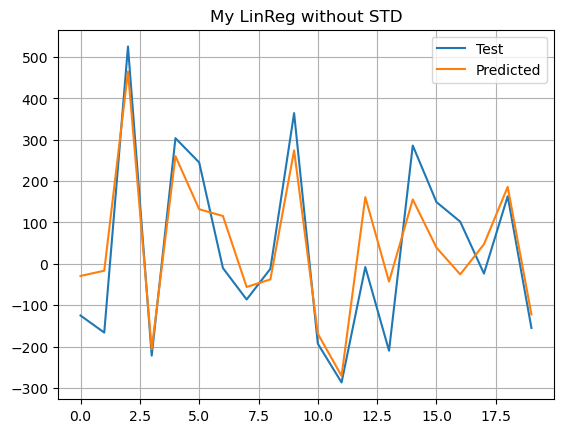

In [11]:
plt.figure()
plt.grid()
plt.plot(y_test, label = 'Test')
plt.plot(y_pred, label = 'Predicted')
plt.title(label='My LinReg without STD')
plt.legend()
plt.show()

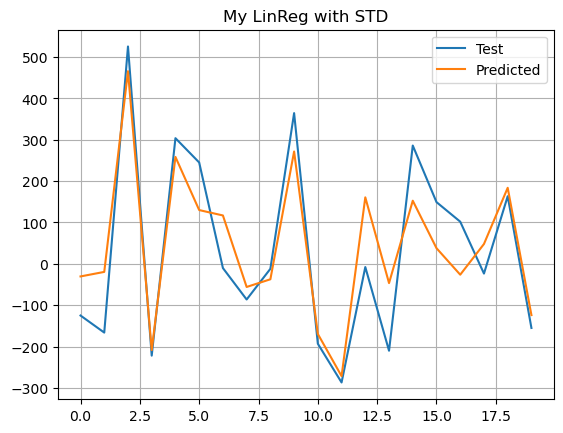

In [12]:
plt.figure()
plt.grid()
plt.plot(y_test, label = 'Test')
plt.plot(y_pred2, label = 'Predicted')
plt.title(label='My LinReg with STD')
plt.legend()
plt.show()

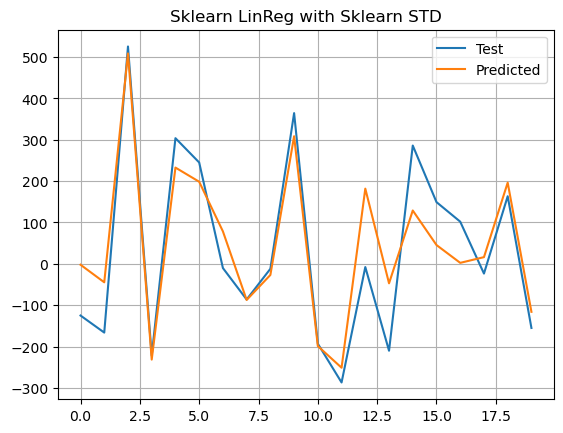

In [13]:
plt.figure()
plt.grid()
plt.plot(y_test, label = 'Test')
plt.plot(y_pred3, label = 'Predicted')
plt.title(label='Sklearn LinReg with Sklearn STD')
plt.legend()
plt.show()

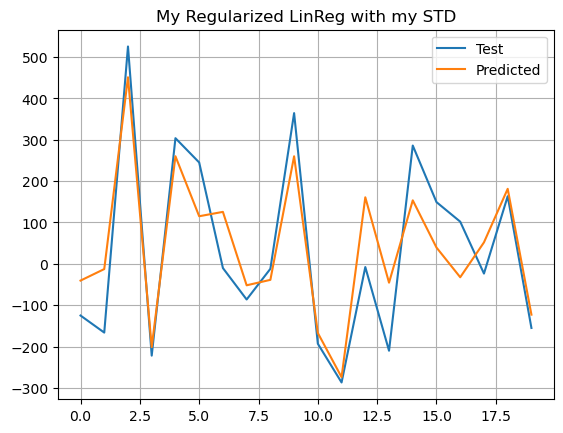

In [14]:
plt.figure()
plt.grid()
plt.plot(y_test, label = 'Test')
plt.plot(y_pred4, label = 'Predicted')
plt.title(label = 'My Regularized LinReg with my STD')
plt.legend()
plt.show()

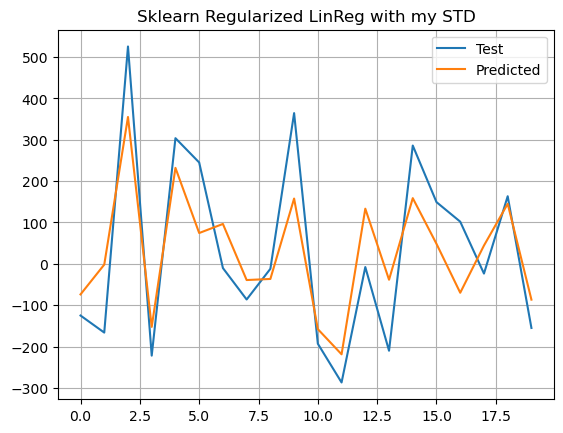

In [15]:
plt.figure()
plt.grid()
plt.plot(y_test, label = 'Test')
plt.plot(y_pred5, label = 'Predicted')
plt.title(label='Sklearn Regularized LinReg with my STD')
plt.legend()
plt.show()

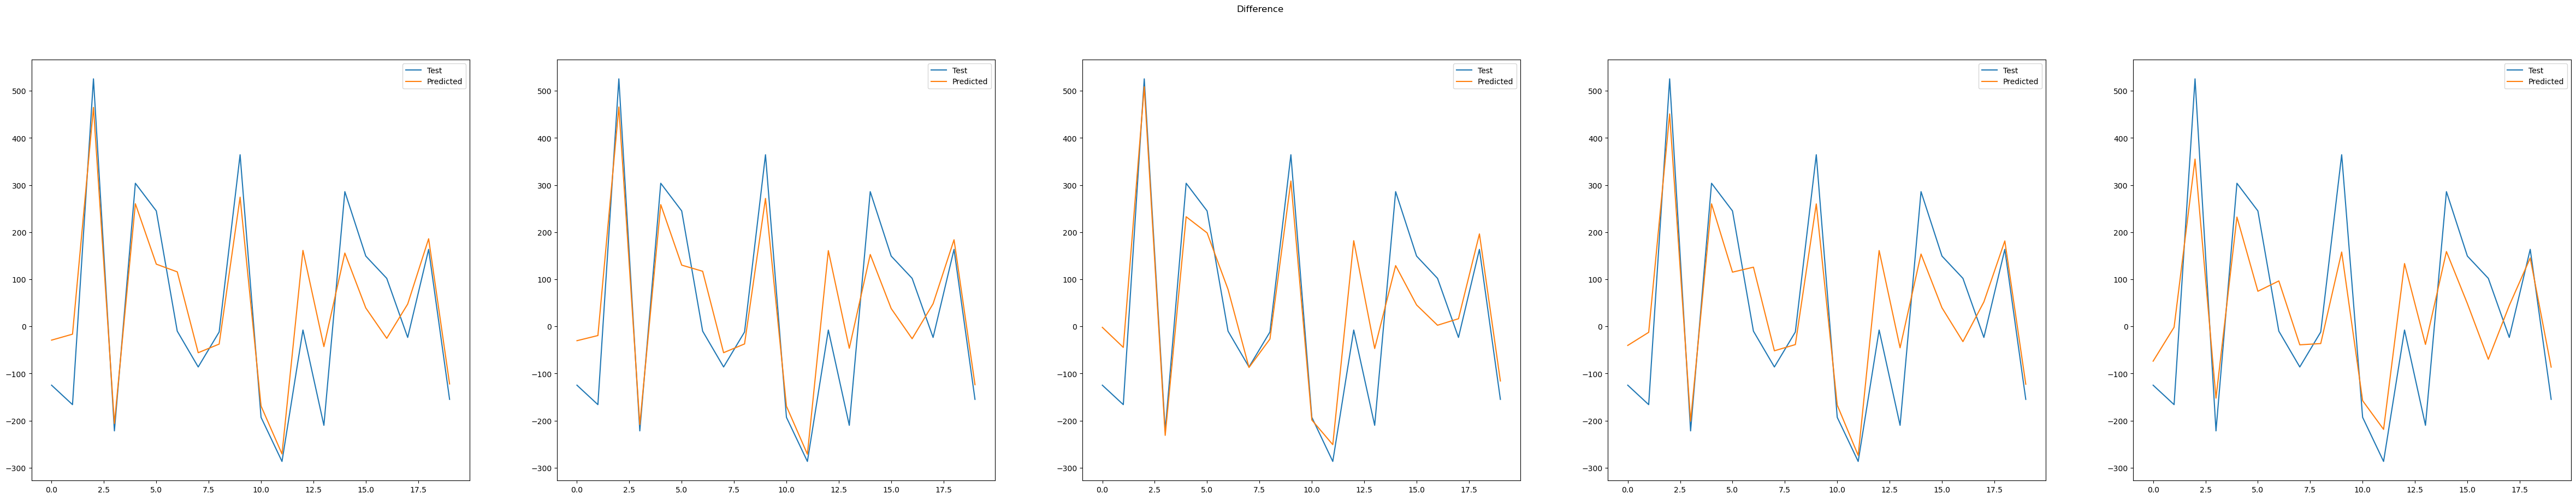

In [17]:
fig,axs = plt.subplots(nrows = 1, ncols = 5)
plt.rcParams ['figure.figsize'] = [60, 20]
fig.suptitle('Difference')

axs[0].plot(y_test, label = 'Test')
axs[0].plot(y_pred, label = 'Predicted')
axs[0].legend()
axs[1].plot(y_test, label = 'Test') 
axs[1].plot(y_pred2, label = 'Predicted')
axs[1].legend()
axs[2].plot(y_test, label = 'Test')
axs[2].plot(y_pred3, label = 'Predicted')
axs[2].legend()
axs[3].plot(y_test, label = 'Test')
axs[3].plot(y_pred4, label = 'Predicted')
axs[3].legend()
axs[4].plot(y_test, label = 'Test')
axs[4].plot(y_pred5, label = 'Predicted')
axs[4].legend()